<h2>Datos Basicos Profesor<h2>

<h2>Nuevos datos desde 2022<h2>

In [ ]:
import pandas as pd


        Fecha       Hora       Animalito  Número
0  2022-09-12   09:00 AM        Elefante      29
1  2022-09-13   09:00 AM         Gallina      25
2  2022-09-14   09:00 AM          Gorila      72
3  2022-09-15   09:00 AM         Tortuga      37
4  2022-09-16   09:00 AM  Oso Hormiguero      55
Datos guardados exitosamente en resultados_guacharoactivo_completo.csv
(12969, 4)


In [ ]:

# Diccionario que mapea el nombre del animal con su número
mapa_animales = {
    "Ballena": 0, "Carnero": 1, "Toro": 2, "Ciempiés": 3, "Alacrán": 4,
    "León": 5, "Ranas": 6, "Perico": 7, "Ratón": 8, "Águila": 9, "Tigre": 10, "Gato": 11,
    "Caballo": 12, "Mono": 13, "Paloma": 14, "Zorro": 15, "Oso": 16, "Pavo": 17, "Burro": 18,
    "Chivo": 19, "Cochino": 20, "Gallo": 21, "Camello": 22, "Cebra": 23, "Iguana": 24, 
    "Gallina": 25, "Vaca": 26, "Perro": 27, "Zamuro": 28, "Elefante": 29, "Caimán": 30,
    "Lapa": 31, "Ardilla": 32, "Pescado": 33, "Venado": 34, "Jirafa": 35, "Culebra": 36,
    "Tortuga": 37, "Búfalo": 38, "Lechuza": 39, "Avispa": 40, "Canguro": 41, "Tucán": 42,
    "Mariposa": 43, "Chigüire": 44, "Garza": 45, "Puma": 46, "Pavo Real": 47, 
    "Puercoespín": 48, "Pereza": 49, "Canario": 50, "Pelícano": 51, "Pulpo": 52, 
    "Caracol": 53, "Grillo": 54, "Oso Hormiguero": 55, "Tiburón": 56, "Pato": 57, 
    "Hormiga": 58, "Pantera": 59, "Camaleón": 60, "Panda": 61, "Cachicamo": 62, 
    "Cangrejo": 63, "Gavilán": 64, "Araña": 65, "Lobo": 66, "Avestruz": 67, "Jaguar": 68, 
    "Conejo": 69, "Bisonte": 70, "Guacamaya": 71, "Gorila": 72, "Hipopótamo": 73, 
    "Turpial": 74, "Guácharo": 75
}

# Leer el archivo de resultados (se asume que el archivo está en el formato adecuado)
with open("new_resultados_guacharoactivo_total.txt", "r", encoding="utf-8") as archivo:
    lineas = archivo.readlines()

# Procesar las líneas para extraer la información
datos = []
for linea in lineas:
    # Filtrar las líneas vacías o irrelevantes
    if linea.strip():
        partes = linea.strip().split(",")
        if len(partes) == 3:
            fecha, hora, animalito = partes
            # Homologar el número del animal según el diccionario
            numero = mapa_animales.get(animalito.strip(), None)
            if numero is not None:
                datos.append([fecha, hora, animalito.strip(), numero])

# Crear el DataFrame con los resultados
df_resultados_new = pd.DataFrame(datos, columns=["Fecha", "Hora", "Animalito", "Número"])

# Mostrar las primeras filas del DataFrame para verificar
print(df_resultados_new.head())

# Guardar el DataFrame a un archivo CSV
# df_resultados.to_csv("resultados_guacharoactivo_completo.csv", index=False, encoding="utf-8")

print("Datos guardados exitosamente en resultados_guacharoactivo_completo.csv")
print(df_resultados_new.shape)

In [5]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv("resultados_guacharoactivo_completo.csv")


In [7]:
df.shape


(12951, 4)

In [8]:
order_Fechas =df.sort_values(by="Fecha", ascending=True)
new_order = order_Fechas[order_Fechas['Fecha'] == "2024-01-02"]
print(new_order.sort_values(by='Hora'))
print(new_order.shape)

           Fecha       Hora       Animalito  Número
25    2024-01-02   01:00 PM         Ardilla      32
9700  2024-01-02   01:00 PM         Ardilla      32
3250  2024-01-02   01:00 PM         Ardilla      32
6475  2024-01-02   01:00 PM         Ardilla      32
9711  2024-01-02   03:00 PM          Venado      34
36    2024-01-02   03:00 PM          Venado      34
6486  2024-01-02   03:00 PM          Venado      34
3261  2024-01-02   03:00 PM          Venado      34
3265  2024-01-02   04:00 PM            Puma      46
40    2024-01-02   04:00 PM            Puma      46
6490  2024-01-02   04:00 PM            Puma      46
9715  2024-01-02   04:00 PM            Puma      46
9720  2024-01-02   05:00 PM  Oso Hormiguero      55
45    2024-01-02   05:00 PM  Oso Hormiguero      55
6495  2024-01-02   05:00 PM  Oso Hormiguero      55
3270  2024-01-02   05:00 PM  Oso Hormiguero      55
50    2024-01-02   06:00 PM         Lechuza      39
6500  2024-01-02   06:00 PM         Lechuza      39
3275  2024-0

In [9]:
df = df.drop_duplicates()

In [10]:
datos_por_fecha = df['Fecha'].value_counts()
value_counts_df = datos_por_fecha.reset_index()

value_counts_df.columns = ['Fecha', 'Conteo']
value_counts_df_ordenado = value_counts_df.sort_values(by='Fecha')
datos_por_hora =df['Hora'].value_counts()

print("Cantidad dias ", datos_por_fecha.shape, "Cantidad de datos por hora", datos_por_hora.shape)
print(value_counts_df_ordenado)


Cantidad dias  (365,) Cantidad de datos por hora (12,)
          Fecha  Conteo
33   2024-01-02      11
84   2024-01-03      10
98   2024-01-04      10
37   2024-01-05      11
100  2024-01-06      10
..          ...     ...
64   2024-12-31      10
364  2025-01-02       5
36   2025-01-03      11
254  2025-01-04       8
230  2025-01-05       9

[365 rows x 2 columns]


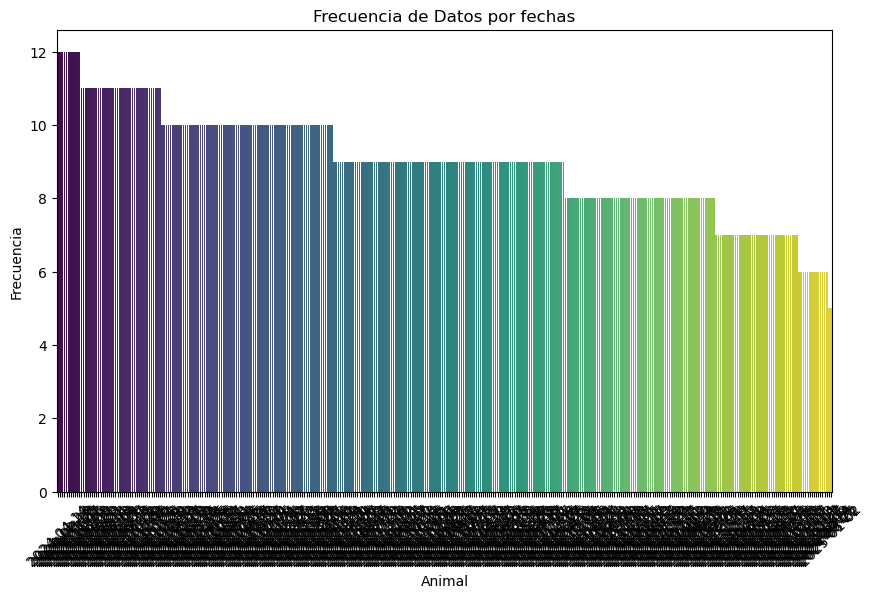

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=datos_por_fecha.index, y=datos_por_fecha.values, palette="viridis")
plt.title("Frecuencia de Datos por fechas")
plt.xlabel("Animal")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


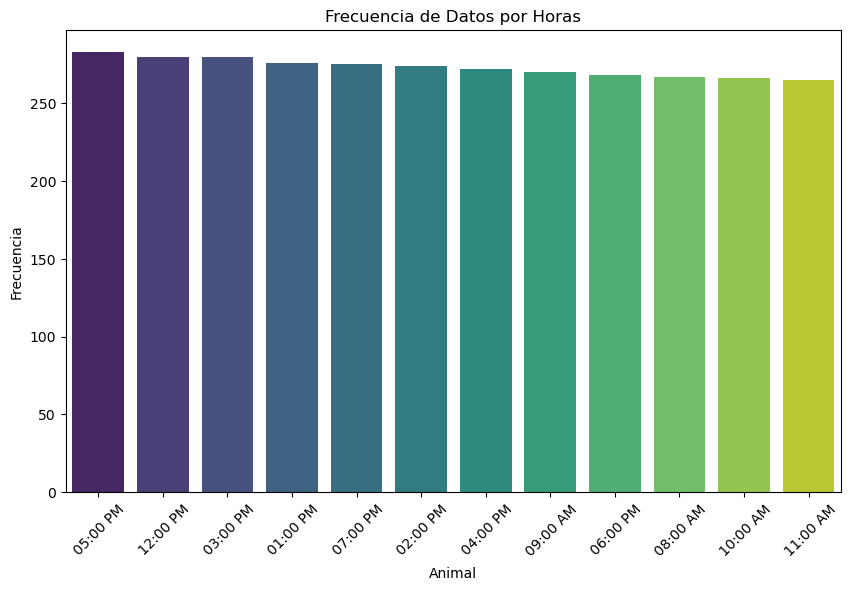

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(x=datos_por_hora.index, y=datos_por_hora.values, palette="viridis")
plt.title("Frecuencia de Datos por Horas")
plt.xlabel("Animal")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


C:\Users\luisg\AppData\Local\Temp\ipykernel_9944\3755628388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_animales.index, y=frecuencia_animales.values, palette="viridis")


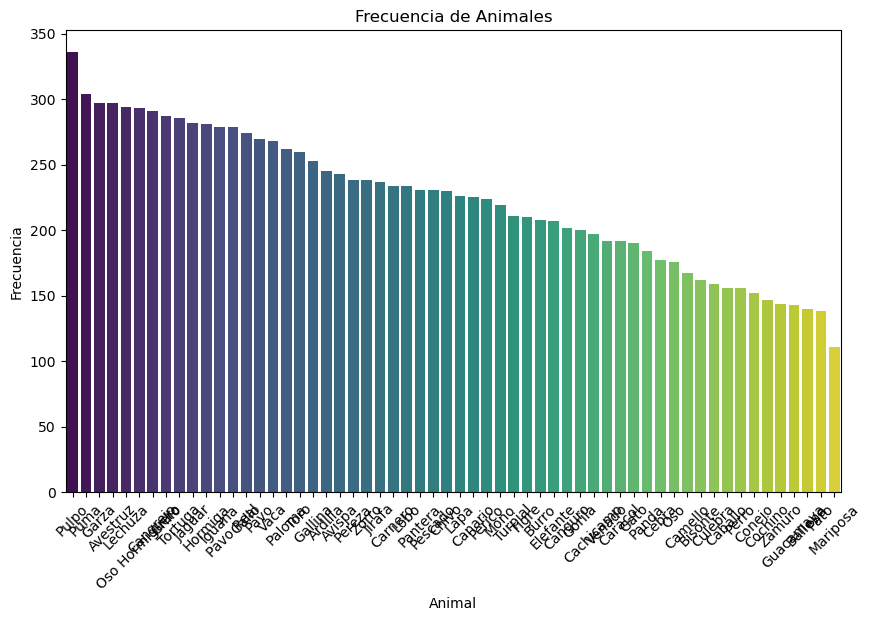

In [52]:
frecuencia_animales = df_resultados_new["Animalito"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_animales.index, y=frecuencia_animales.values, palette="viridis")
plt.title("Frecuencia de Animales")
plt.xlabel("Animal")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

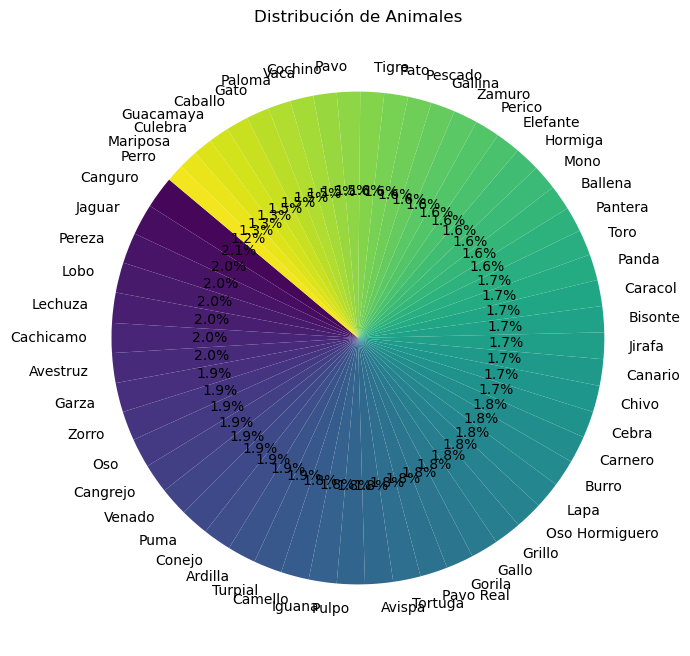

In [115]:
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_animales, labels=frecuencia_animales.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("viridis", len(frecuencia_animales)))
plt.title("Distribución de Animales")
plt.show()

C:\Users\luisg\AppData\Local\Temp\ipykernel_32352\866015855.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


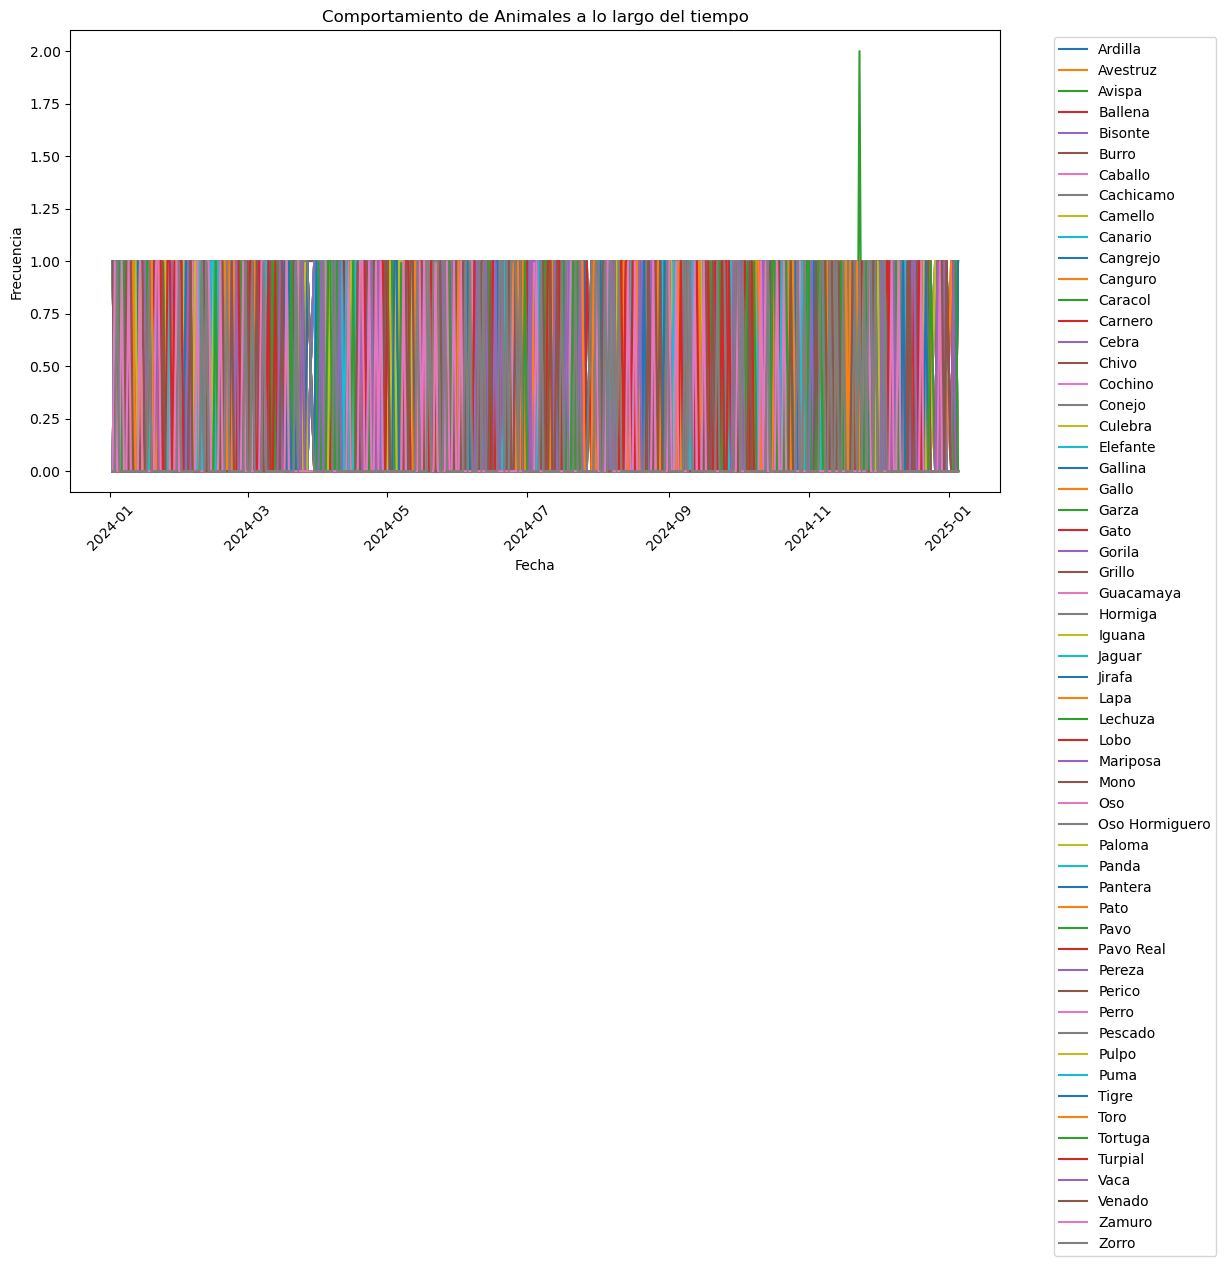

In [ ]:
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")


animales_por_fecha = df.groupby(["Fecha", "Animalito"]).size().unstack(fill_value=0)


plt.figure(figsize=(12, 6))
for animal in animales_por_fecha.columns:
    plt.plot(animales_por_fecha.index, animales_por_fecha[animal], label=animal)
plt.title("Comportamiento de Animales a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Test datos dias sin aparecer<h3>

In [30]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

ultima_aparicion = {}


resultados = []

# Iterar sobre cada fila del DataFrame
for index, row in df.iterrows():
    clave = (row['Animalito'], row['Número'])
    if clave in ultima_aparicion:
        diferencia_dias = (row['Fecha'] - ultima_aparicion[clave]).days
        resultados.append(diferencia_dias)
    else:
        resultados.append(0)  # No hay aparición previa
    ultima_aparicion[clave] = row['Fecha']

# Añadir la columna de resultados al DataFrame
df['day_not_show'] = resultados
df

,Fecha,Hora,Animalito,Número,Dias sin aparecer,day_not_show
0,2024-01-02,08:00 AM,Ballena,0,0,0
1,2024-01-03,08:00 AM,Pescado,33,0,0
2,2024-01-04,08:00 AM,Gallina,25,0,0
3,2024-01-05,08:00 AM,Lapa,31,0,0
4,2024-01-06,08:00 AM,Panda,61,0,0
...,...,...,...,...,...,...
12946,2025-01-05,06:00 PM,Tigre,10,14,14
12947,2025-01-02,07:00 PM,Lapa,31,9,9
12948,2025-01-03,07:00 PM,Bisonte,70,5,5
12949,2025-01-04,07:00 PM,Tortuga,37,5,5


<h3> testo con datos nuevos de de 2022<h3>

In [ ]:
df_copy = df_resultados_new.copy()

df_copy['Hora'] = df_copy['Hora'].str.strip()
df_copy['Fecha'] = pd.to_datetime(df_copy['Fecha'], format='%Y-%m-%d')
df_copy['Hora'] = pd.to_datetime(df_copy['Hora'], format='%I:%M %p').dt.hour

In [12]:
df_copy['dia_semana'] = df_copy['Fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df_copy['mes'] = df_copy['Fecha'].dt.month
df_copy['cant_dias'] = (df_copy['Fecha'] - df_copy['Fecha'].min()).dt.days  # Convierte a días

df_copy

,Fecha,Hora,Animalito,Número,dia_semana,mes,cant_dias
0,2022-09-12,9,Elefante,29,0,9,203
1,2022-09-13,9,Gallina,25,1,9,204
2,2022-09-14,9,Gorila,72,2,9,205
3,2022-09-15,9,Tortuga,37,3,9,206
4,2022-09-16,9,Oso Hormiguero,55,4,9,207
...,...,...,...,...,...,...,...
12964,2025-03-22,18,Jaguar,68,5,3,1125
12965,2025-03-17,19,Avispa,40,0,3,1120
12966,2025-03-18,19,Oso Hormiguero,55,1,3,1121
12967,2025-03-19,19,Canguro,41,2,3,1122


In [13]:
X = df_copy[['Hora', 'dia_semana', 'mes','cant_dias']] 
y = df_copy['Animalito']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
unique_classes = np.unique(y_train)
print("Clases únicas en y_train:", unique_classes)

Clases únicas en y_train: ['Ardilla' 'Avestruz' 'Avispa' 'Ballena' 'Bisonte' 'Burro' 'Caballo'
 'Cachicamo' 'Camello' 'Canario' 'Cangrejo' 'Canguro' 'Caracol' 'Carnero'
 'Cebra' 'Chivo' 'Cochino' 'Conejo' 'Culebra' 'Elefante' 'Gallina' 'Gallo'
 'Garza' 'Gato' 'Gorila' 'Grillo' 'Guacamaya' 'Hormiga' 'Iguana' 'Jaguar'
 'Jirafa' 'Lapa' 'Lechuza' 'Lobo' 'Mariposa' 'Mono' 'Oso' 'Oso Hormiguero'
 'Paloma' 'Panda' 'Pantera' 'Pato' 'Pavo' 'Pavo Real' 'Pereza' 'Perico'
 'Perro' 'Pescado' 'Pulpo' 'Puma' 'Tigre' 'Toro' 'Tortuga' 'Turpial'
 'Vaca' 'Venado' 'Zamuro' 'Zorro']


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [58]:
model = XGBClassifier(tree_method='hist', enable_categorical=True)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train,y_train_encoded )

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de validación:", grid_search.best_score_)

Mejores hiperparámetros: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Mejor puntuación de validación: 0.26881927710843373


In [17]:
final_model=  XGBClassifier(tree_method='hist', enable_categorical=True, colsample_bytree=0.8,gamma=0,learning_rate=0.2,max_depth=7,n_estimators=100,subsample=0.8)
final_model.fit(X_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1] 


accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
# print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.27525057825751736
Precision: 0.28097947090483055
Recall: 0.27525057825751736
F1-Score: 0.2755475897168629
Confusion Matrix:
[[ 9  0  0 ...  1  0  2]
 [ 2 18  1 ...  1  1  0]
 [ 0  0  5 ...  0  0  1]
 ...
 [ 0  2  0 ...  0  1  2]
 [ 0  0  0 ...  1  0  1]
 [ 1  1  1 ...  0  0  7]]


In [22]:
# Mostrar las predicciones para los 12 sorteos del día siguiente
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10,15,20,125,200,300],
    'max_depth': [None,10,15,20,30,35],
    'min_samples_split': [10,20,30,40,50],
    'max_features':[5,6,7,8,10,15,20,'sqrt','log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train,y_train_encoded )

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de validación:", grid_search.best_score_)

# print(predicted_df)

Mejores hiperparámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300}
Mejor puntuación de validación: 0.2702647514042099


In [23]:
final_model = RandomForestClassifier(n_estimators=300,min_samples_split=10,max_features="sqrt", max_depth=20)
final_model.fit(X_train,y_train_encoded)


RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=300)

In [24]:
y_pred=final_model.predict(X_test)


In [ ]:
# y_pred = final_mod_grid.predict(X_test)

# Calcular la precisión
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_encoded, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_encoded, y_pred)
print(f"Error Absoluto Medio (MAE): {mae:.2f}")

Error Cuadrático Medio (MSE): 426.22
Error Absoluto Medio (MAE): 14.46
Coeficiente de Determinación (R²): -0.5454376523285296


<h1>Pureba nuevo parametro con numero anterior a la hora <h1>

In [27]:
df_new_test = df_resultados_new.copy()

df_new_test['Hora'] = df_new_test['Hora'].str.strip()
df_new_test['Fecha'] = pd.to_datetime(df_new_test['Fecha'], format='%Y-%m-%d')
df_new_test['Hora'] = pd.to_datetime(df_new_test['Hora'], format='%I:%M %p').dt.hour

In [ ]:

df_new_test['dia_semana'] = df_new_test['Fecha'].dt.dayofweek  # dias de la semana ,0 ,1,2, 3 empezando desde el lunes 0
df_new_test['mes'] = df_new_test['Fecha'].dt.month
df_new_test['cant_dias'] = (df_new_test['Fecha'] - df_new_test['Fecha'].min()).dt.days 
df_new_test.sort_values(by="Fecha",inplace=True)
df_new_test['n_after'] = df_new_test['Número'].shift(1)


In [53]:
df_new_test.fillna(0)

,Fecha,Hora,Animalito,Número,dia_semana,mes,cant_dias,n_after
3286,2022-02-21,9,Tortuga,37,0,2,0,0.0
3292,2022-02-21,10,Panda,61,0,2,0,37.0
3297,2022-02-21,11,Lobo,66,0,2,0,61.0
3309,2022-02-21,13,Avispa,40,0,2,0,66.0
3315,2022-02-21,14,Canario,50,0,2,0,40.0
...,...,...,...,...,...,...,...,...
12951,2025-03-22,15,Lechuza,39,5,3,1125,57.0
12964,2025-03-22,18,Jaguar,68,5,3,1125,39.0
12933,2025-03-22,11,Burro,18,5,3,1125,68.0
12941,2025-03-22,13,Lobo,66,5,3,1125,18.0


In [54]:
X = df_new_test[['Hora', 'dia_semana', 'mes','cant_dias','n_after']] 
y = df_new_test['Animalito']

X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded_two = label_encoder.fit_transform(y_train_two)
y_test_encoded_two = label_encoder.transform(y_test_two)

In [ ]:
model = XGBClassifier(tree_method='hist', enable_categorical=True)

param_grid = {
    'max_depth': [3, 5, 7,10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300,400,500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train_two,y_train_encoded_two )

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de validación:", grid_search.best_score_)

In [64]:
final_model=  XGBClassifier(tree_method='hist', enable_categorical=True, colsample_bytree=0.8,gamma=0,learning_rate=0.2,max_depth=7,n_estimators=100,subsample=0.8)
final_model.fit(X_train_two,y_train_encoded_two)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
y_pred = final_model.predict(X_test_two)
y_pred_proba = final_model.predict_proba(X_test_two)[:, 1] 


accuracy = accuracy_score(y_test_encoded_two, y_pred)
precision = precision_score(y_test_encoded_two, y_pred, average='weighted')
recall = recall_score(y_test_encoded_two, y_pred, average='weighted')
f1 = f1_score(y_test_encoded_two, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
# print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.27062451811873556
Precision: 0.27982220257262325
Recall: 0.27062451811873556
F1-Score: 0.2726581249744445
Confusion Matrix:
[[2 0 1 ... 2 0 2]
 [0 3 1 ... 1 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 1]
 [0 1 0 ... 2 0 0]
 [1 1 1 ... 0 0 2]]


In [35]:

model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [300,350,400,450,500],
    'max_depth': [10,35],
    'min_samples_split': [10,20,50],
    'max_features':[10,15,20,'sqrt','log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train_two,y_train_encoded_two )

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de validación:", grid_search.best_score_)



Mejores hiperparámetros: {'max_depth': 35, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 450}
Mejor puntuación de validación: 0.27383132530120485


In [56]:
model_final_new_col = RandomForestClassifier(max_depth=35,max_features='sqrt',min_samples_split=10,n_estimators=450)
model_final_new_col.fit(X_train_two,y_train_encoded_two)

RandomForestClassifier(max_depth=35, min_samples_split=10, n_estimators=450)

In [60]:
y_pred_new_col=model_final_new_col.predict(X_test_two)


In [ ]:
# y_pred = final_mod_grid.predict(X_test)

# Calcular la precisión
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_encoded_two, y_pred_new_col)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_encoded_two, y_pred_new_col)
print(f"Error Absoluto Medio (MAE): {mae:.2f}")

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_encoded_two, y_pred_new_col)
print(f"Score Accurancy: {accuracy}")

Error Cuadrático Medio (MSE): 401.02
Error Absoluto Medio (MAE): 14.02
Coeficiente de Determinación (R²): 0.26985350809560527


# Redes reuronales

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.metrics import accuracy_score
import numpy as np




In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

c:\Users\luisg\anaconda3\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.utils import to_categorical




encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))


preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), ["Hora", "dia_semana", "mes","cant_dias","n_after"])]
)
X_processed = preprocessor.fit_transform(X)

In [63]:
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
from tensorflow.keras.layers import Dense, Dropout

print(X_processed)

[[-1.48503589 -1.49771986  0.60636881 -0.85415465         nan]
 [-1.48503589 -0.99696117  0.60636881 -0.85107819 -0.4348307 ]
 [-1.48503589 -0.49620248  0.60636881 -0.84800172 -0.63084139]
 ...
 [ 1.56499665 -0.99696117 -1.26259985  1.97004168  0.1041987 ]
 [ 1.56499665 -0.49620248 -1.26259985  1.97311814  0.83923878]
 [ 1.56499665  0.00455621 -1.26259985  1.97619461  0.15320137]]


In [45]:
model = Sequential([
      Dense(64, activation="relu", input_shape=(X_processed.shape[1],)),
    Dropout(0.3),  # Regularización para evitar overfitting
    Dense(32, activation="relu"),
    Dense(y_encoded.shape[1], activation="softmax")  # Salida multiclase
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                384       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 58)                1914      
                                                                 
Total params: 4,378
Trainable params: 4,378
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(n_splits=3)  # Reducir splits por eficiencia
scores = []

X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

    
model.fit(X_train_rn, y_train_rn, epochs=50, batch_size=32, verbose=0,validation_data=(X_test_rn,y_test_rn))
loss, acc = model.evaluate(X_test_rn, y_test_rn, verbose=0)
print(acc, loss)
scores.append(acc)

print(f"Precisión promedio: {sum(scores)/len(scores):.2f}")

0.28103315830230713 nan
Precisión promedio: 0.28
